In [ ]:
!wget https://tufts.box.com/shared/static/325sgkodnq30ez61ugazvctif6r24hsu.csv -O daf.csv

--2024-05-23 19:14:49--  https://tufts.box.com/shared/static/325sgkodnq30ez61ugazvctif6r24hsu.csv
Resolving tufts.box.com (tufts.box.com)... 74.112.186.144
Connecting to tufts.box.com (tufts.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/325sgkodnq30ez61ugazvctif6r24hsu.csv [following]
--2024-05-23 19:14:49--  https://tufts.box.com/public/static/325sgkodnq30ez61ugazvctif6r24hsu.csv
Reusing existing connection to tufts.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://tufts.app.box.com/public/static/325sgkodnq30ez61ugazvctif6r24hsu.csv [following]
--2024-05-23 19:14:49--  https://tufts.app.box.com/public/static/325sgkodnq30ez61ugazvctif6r24hsu.csv
Resolving tufts.app.box.com (tufts.app.box.com)... 74.112.186.144
Connecting to tufts.app.box.com (tufts.app.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https:/

# Topic Modeling using Traditional Machine Learning

In this workshop, we'll be learning how to conduct topic modelling on text using `sci-kit learn`.

This workshop builds on what we learned about TF-IDF in the `Textual Feature Extraction using Traditional Machine Learning`. In that notebook, we saw how we could take sections of text from a larger work and turn them into a numerial representations of that text. We also saw how we might begin to manipulate this numerical data, for example using linear regression. In this workshop, we'll see a more complex transformation of the numerical data. That said, the underlying concept remains the same: we can split up our corpus into several texts and then we can using TF-IDF to transform this text into a matrix of numbers. Instead of using the dot product to determine similarity between chapters, though, we'll see how we can find similar word usage acorss different chapters.

**Topic modelling seeks to group together words which have a similar usage. These groups constitute a topic**. As a result, topic modelling can be particularly useful if you don't know what is in a text, but you know that it has distinct parts. As we will see, there are two different approaches to topic modelling, Non-negative Matrix Factorization (NMF) and Latent Dirichlet Allocation (LDA), but the results will be very similar.  

## Data

For this example, like in `Textual Feature Extraction using Traditional Machine Learning`, we'll be using Edward Gibbon's *Decline and Fall of the Roman Empire* as our example text. I like using this source for topic modelling because, providing a history of Western Europe from the 200s to the 1450s AD, it's incredibly long and multifacetted. These are the sorts of texts for which topic modelling can be most useful, though feel free to use any other text instead.

In [ ]:
import pandas as pd
import pprint
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import matplotlib.pyplot as plt

random_state = 1337 # will be using later

In [ ]:
daf = pd.read_csv('daf.csv')[['title','text']]
daf

,title,text
0,The Extent Of The Empire In The Age Of The Ant...,Introduction. The Extent And Military Fo...
1,The Extent Of The Empire In The Age Of The Ant...,"It was an ancient tradition, that when the Cap..."
2,The Extent Of The Empire In The Age Of The Ant...,The camp of a Roman legion presented the appea...
3,The Internal Prosperity In The Age Of The Anto...,Of The Union And Internal Prosperity Of The Ro...
4,The Internal Prosperity In The Age Of The Anto...,Till the privileges of Romans had been progres...
...,...,...
291,Final Settlement Of The Ecclesiastical State.—...,Never perhaps has the energy and effect of a s...
292,Final Settlement Of The Ecclesiastical State.—...,"Without drawing his sword, count Pepin restore..."
293,Final Settlement Of The Ecclesiastical State.—...,"The royal prerogative of coining money, which ..."
294,Prospect Of The Ruins Of Rome In The Fifteenth...,Prospect Of The Ruins Of Rome In The Fifteenth...


In [ ]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(daf.iloc[0]['text'][:300])

('Introduction.       The Extent And Military Force Of The Empire In The Age '
 'Of The      Antonines.  In the second century of the Christian Æra, the '
 'empire of Rome comprehended the fairest part of the earth, and the most '
 'civilized portion of mankind. The frontiers of that extensive monarchy were '
 'guard')


In [ ]:
# applying TF-IDF to the text in Gibbon
# feel free to play around with the default parameters
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = tfidf.fit_transform(daf['text']) # dtm = document-term matrix
dtm

<296x8274 sparse matrix of type '<class 'numpy.float64'>'
	with 100139 stored elements in Compressed Sparse Row format>

## Non-negative Matrix Factorization (NMF)

The NMF algorithm asks what document matrix, $W$ and what word matrix $H$ would need to be multiplied together so that we arrive back at our original document-term matrix (DTM), the TF-IDF transformed text. In other words, it attempts to group those words which would have to occur together in such a pattern so as to produce the original DTM. Importantly, this process requires the user to input the amount of topics they think is appropriate for the text. Otherwise, NMF would return its approximation of the exact same DTM, with each “topic” comprising just a single word. Instead, topic modeling seeks to project this approximation into the predefined amount of topics, so it must group together words which have a high probability of occurring together.

It is for this reason that we import NMF from the `decomposition` module. Outside of NLP, NMF is used to reduce the dimensionality of high dimensional inputs, like images or complex tabular datasets. This is exactly what it's doing in this context as well: taking the features from our TF-IDF vectorization and reducing them to the given number of topics.

In this way, you think of topics of both NMF and LDA, which we will turn to after NMF, as respresenting groups of probability. All words are in all topics, but we care the most about those which are most likely to be part of a given topic. Thus, below, we'll see "THE TOP 15 WORDS" for each topic. These are then the fifteen words most likely to be associated with each other.

In [ ]:
nmf_model = NMF(n_components=12,random_state=random_state)
nmf_model.fit(dtm)

NMF(n_components=12, random_state=1337)

In [ ]:
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index+1}')
    # note: we use `tfidf.get_feature_names_out` to access the actual words, not just the index position of them
    pp.pprint([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #1
[   'guards',
    'rome',
    'alexander',
    'caracalla',
    'emperor',
    'prætorian',
    'military',
    'empire',
    'public',
    'pertinax',
    'roman',
    'commodus',
    'augustus',
    'severus',
    'senate']


THE TOP 15 WORDS FOR TOPIC #2
[   'truth',
    'zeal',
    'christ',
    'worship',
    'bishops',
    'religious',
    'primitive',
    'persecution',
    'divine',
    'christian',
    'christianity',
    'religion',
    'faith',
    'church',
    'christians']


THE TOP 15 WORDS FOR TOPIC #3
[   'sultan',
    'manuel',
    'years',
    'byzantine',
    'andronicus',
    'turkish',
    'alexius',
    'palæologus',
    'emperor',
    'greek',
    'turks',
    'john',
    'latins',
    'greeks',
    'constantinople']


THE TOP 15 WORDS FOR TOPIC #4
[   'gods',
    'death',
    'gaul',
    'army',
    'temple',
    'sapor',
    'monarch',
    'march',
    'emperor',
    'jovian',
    'gallus',
    'antioch',
    'c¾sar',
    'constan

## Latent Dirichlet Allocation (LDA)

**Nota bene**: *Latent Dirichlet Allocation is usually abbreviated as 'LDA'. However, Linear Discriminant Analysis, another dimensionality reduction algorithm, is also frequently abbreviated as 'LDA'. This unfortunate coincidence may be confusing if you do your own research, so keep it in mind.*

Similar to NMF, LDA supposes that we can reverse engineer the process that generated the documents. The documents, the document-term matrix from our TF-IDF transformation, are understood as random mixtures over latent topics, where each topic is characterized by a symmetric *Dirichlet* distribution over all of the words in our document-term matrix.

In this way, NMF and LDA are quite similar. They both reduce the dimensionality of text features (in our case from TF-IDF). Where the two algorithms differ is in the probabiltiy distribution that each assumes. NMF is much more naive in its approach, assuming that each word comes from a uniform distribution and is, before any computation, as equally likely to be in any topic as any other word. LDA assumes that the words are sampled from a Poisson distribtuion and that topics are sampled a Dirichlet distribution. This difference theoretically makes LDA more efficient and accurate for text and NMF better for other uses.

In practice, however, determining which is better comes from imperical testing and evaluation against research question.

In [ ]:
lda_model = LatentDirichletAllocation(n_components=12,random_state=random_state)
lda_model.fit(dtm)

LatentDirichletAllocation(n_components=12, random_state=1337)

In [ ]:
for index,topic in enumerate(lda_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index+1}')
    pp.pprint([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #1
[   'christians',
    'public',
    'years',
    'arms',
    'church',
    'italy',
    'barbarians',
    'death',
    'constantine',
    'war',
    'people',
    'rome',
    'emperor',
    'empire',
    'roman']


THE TOP 15 WORDS FOR TOPIC #2
[   'livy',
    'captivating',
    'earliest',
    'stipulate',
    'ulphilas',
    'rebuilt',
    'animating',
    'wielded',
    'dictator',
    'apollo',
    'rosamond',
    'sigismond',
    'bajazet',
    'clovis',
    'rienzi']


THE TOP 15 WORDS FOR TOPIC #3
[   'britons',
    'alteration',
    'readers',
    'sages',
    'varangians',
    'obtains',
    'lateran',
    'domitian',
    'streams',
    'vii',
    'russians',
    'saxon',
    'otho',
    'clovis',
    'macrinus']


THE TOP 15 WORDS FOR TOPIC #4
[   'rudeness',
    'hymns',
    'seasonably',
    'kobad',
    'hormouz',
    'roasted',
    'novels',
    'newly',
    'berlin',
    'eudoxia',
    'ricimer',
    'languages',
    'russians',
    'meeting

## Visualizing Topic Models

### Visualizing topic probability

As we saw above, a topic is just a clustering together of words, based on a probability to associate with each other. We can see visualize this probability to give us a better sense of what's happen.

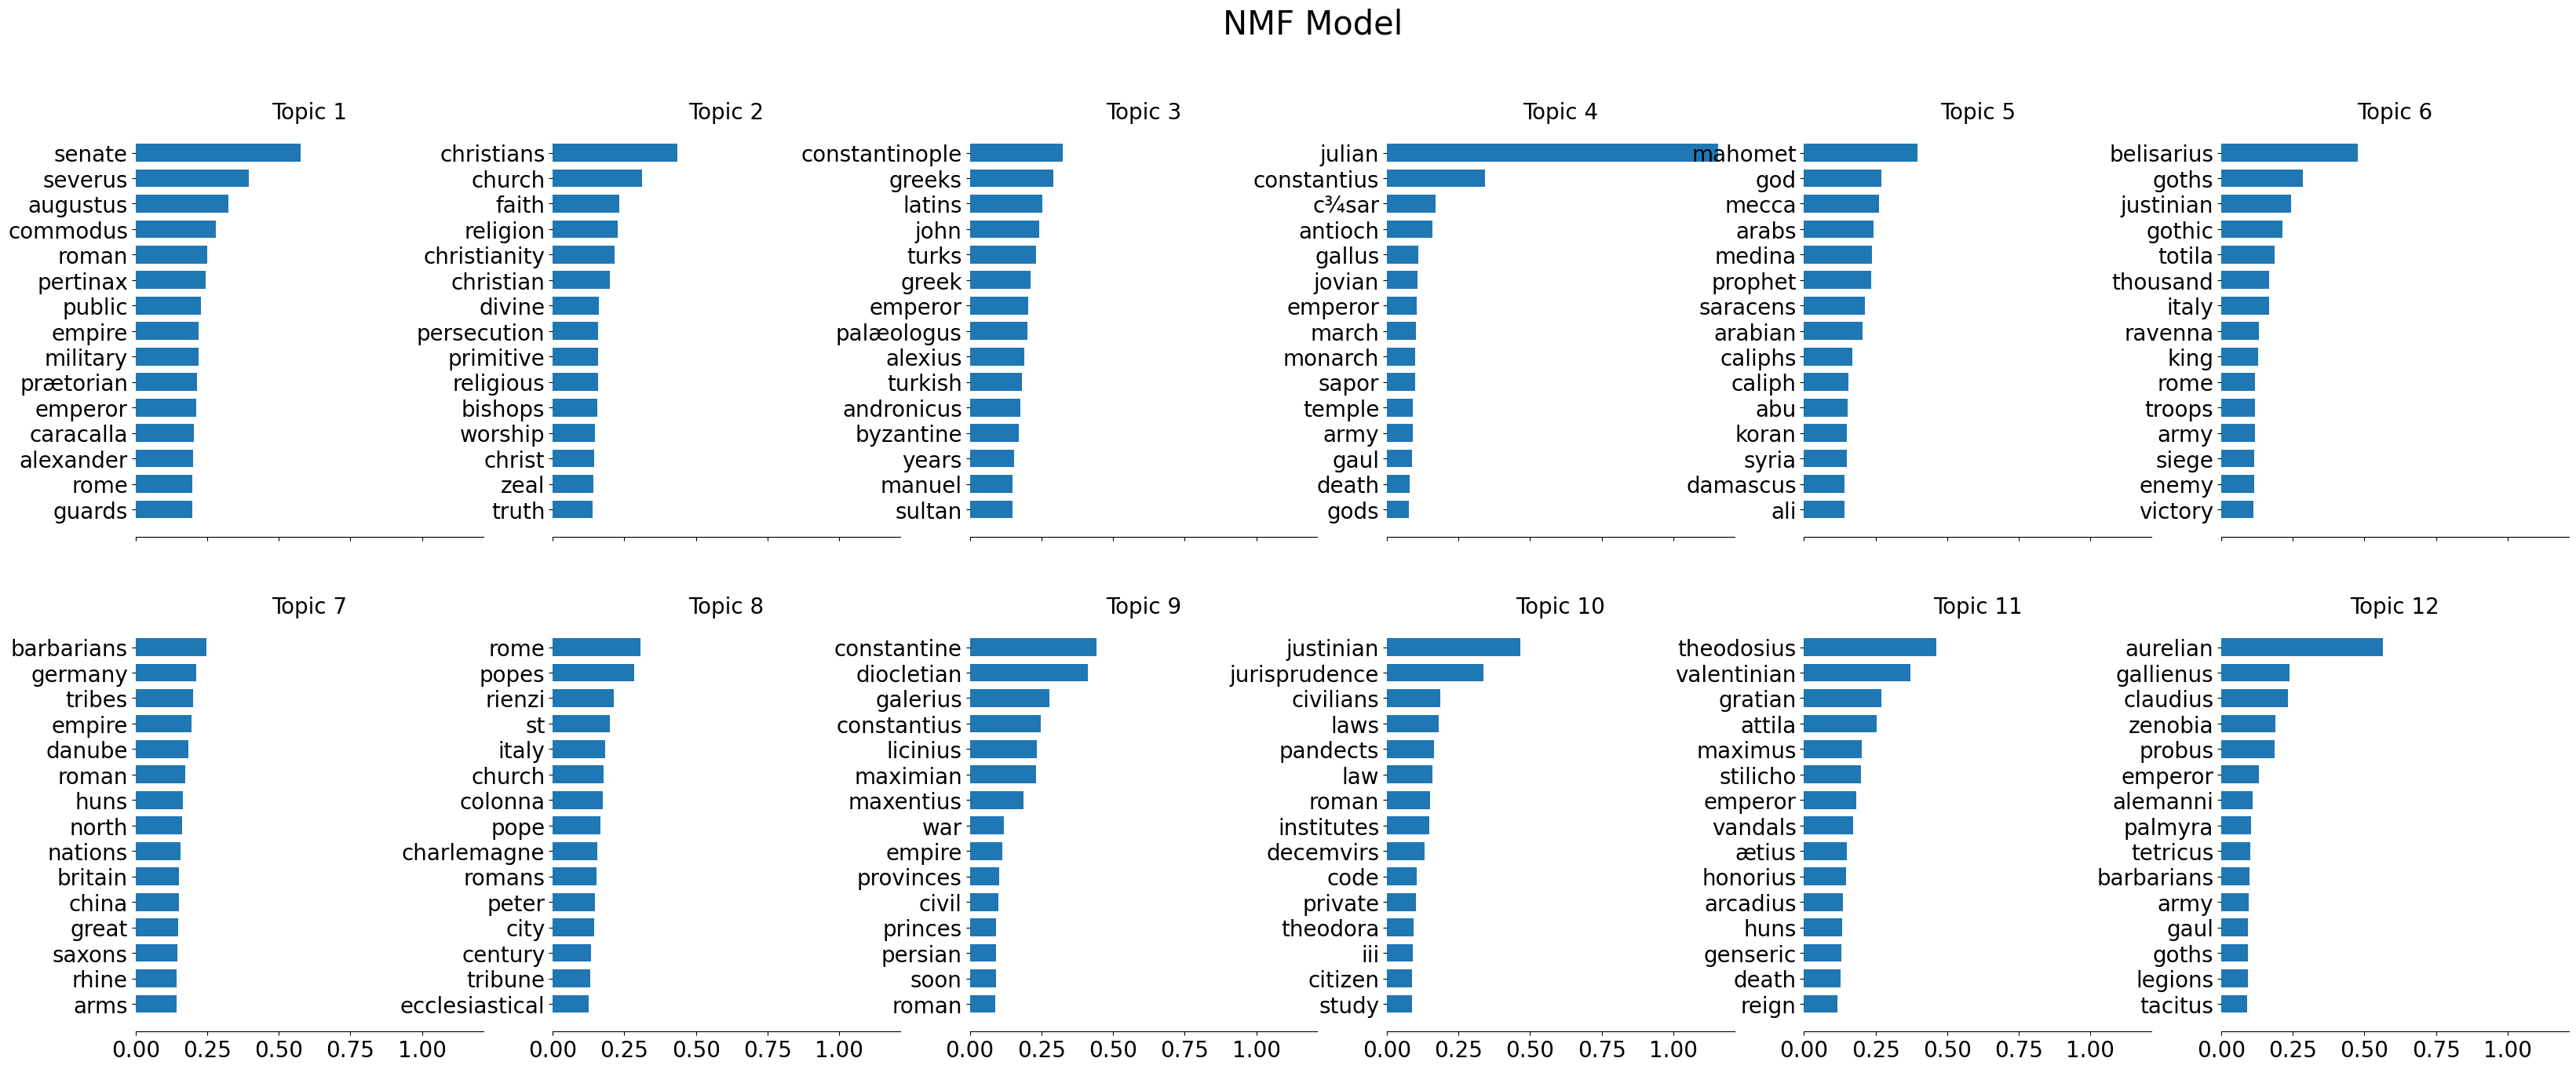

In [ ]:
# parameters from above
n_components = 12
top_words = 15

# plotting
fig, axes = plt.subplots(2, (n_components+1)//2, figsize=(40,15), sharex=True)
axes = axes.flatten()

# looping through each topic
for topic_idx, topic in enumerate(nmf_model.components_):
    # topic manipuluation
    top_features_ind = topic.argsort()[:-top_words - 1:-1] # getting top word indices for each topic
    top_features = [tfidf.get_feature_names_out()[i] for i in top_features_ind] # getting the actual text
    weights = topic[top_features_ind] # getting the probability of each word

    # plotting
    ax = axes[topic_idx]
    ax.barh(top_features, weights, height=.7)
    ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 20})
    ax.invert_yaxis()
    ax.tick_params(axis="both", which="major", labelsize=20)
    for i in "top right left".split():
        ax.spines[i].set_visible(False)
    fig.suptitle('NMF Model', fontsize=30)

plt.show()

### Visualizing topics over time

In addition to looking at the composition of each topic, we can also visualize how topics interact over the course of a single corpus.

In [ ]:
daf_time = daf.copy().reset_index().rename(columns={'index':'chapter_number'})
daf_time['chapter_number'] = daf_time['chapter_number'] + 1
daf_time

,chapter_number,title,text
0,1,The Extent Of The Empire In The Age Of The Ant...,Introduction. The Extent And Military Fo...
1,2,The Extent Of The Empire In The Age Of The Ant...,"It was an ancient tradition, that when the Cap..."
2,3,The Extent Of The Empire In The Age Of The Ant...,The camp of a Roman legion presented the appea...
3,4,The Internal Prosperity In The Age Of The Anto...,Of The Union And Internal Prosperity Of The Ro...
4,5,The Internal Prosperity In The Age Of The Anto...,Till the privileges of Romans had been progres...
...,...,...,...
291,292,Final Settlement Of The Ecclesiastical State.—...,Never perhaps has the energy and effect of a s...
292,293,Final Settlement Of The Ecclesiastical State.—...,"Without drawing his sword, count Pepin restore..."
293,294,Final Settlement Of The Ecclesiastical State.—...,"The royal prerogative of coining money, which ..."
294,295,Prospect Of The Ruins Of Rome In The Fifteenth...,Prospect Of The Ruins Of Rome In The Fifteenth...


In [ ]:
# adding a column for each topic to each chapter
# these represent the topic membership of each chapter
for i in range(n_components):
    daf_time[f'Topic {i+1}'] = nmf_model.transform(dtm)[:,i]
daf_time

,chapter_number,title,text,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12
0,1,The Extent Of The Empire In The Age Of The Ant...,Introduction. The Extent And Military Fo...,0.140357,0.000000,0.000000,0.000000,0.000000,0.000000,0.138453,0.000000,0.008540,0.000000,0.0,0.000000
1,2,The Extent Of The Empire In The Age Of The Ant...,"It was an ancient tradition, that when the Cap...",0.109082,0.013866,0.000000,0.004476,0.000000,0.000000,0.116163,0.000000,0.007720,0.000000,0.0,0.006961
2,3,The Extent Of The Empire In The Age Of The Ant...,The camp of a Roman legion presented the appea...,0.016352,0.000000,0.000000,0.000000,0.009661,0.000000,0.327493,0.000000,0.016435,0.000000,0.0,0.027077
3,4,The Internal Prosperity In The Age Of The Anto...,Of The Union And Internal Prosperity Of The Ro...,0.059518,0.143894,0.000000,0.004308,0.000000,0.000000,0.038118,0.000000,0.000000,0.011437,0.0,0.000000
4,5,The Internal Prosperity In The Age Of The Anto...,Till the privileges of Romans had been progres...,0.063011,0.020749,0.000000,0.000000,0.000000,0.000000,0.096147,0.025652,0.000000,0.078776,0.0,0.007686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,292,Final Settlement Of The Ecclesiastical State.—...,Never perhaps has the energy and effect of a s...,0.000000,0.000000,0.000000,0.005997,0.002712,0.040459,0.000000,0.299737,0.005080,0.000000,0.0,0.008144
292,293,Final Settlement Of The Ecclesiastical State.—...,"Without drawing his sword, count Pepin restore...",0.000000,0.000000,0.002737,0.002752,0.000000,0.001784,0.000000,0.432059,0.000000,0.000000,0.0,0.002417
293,294,Final Settlement Of The Ecclesiastical State.—...,"The royal prerogative of coining money, which ...",0.015235,0.000000,0.000000,0.013029,0.007963,0.033410,0.000000,0.296186,0.000000,0.000000,0.0,0.004897
294,295,Prospect Of The Ruins Of Rome In The Fifteenth...,Prospect Of The Ruins Of Rome In The Fifteenth...,0.000000,0.047675,0.000000,0.000000,0.000000,0.044810,0.085804,0.106584,0.000000,0.055540,0.0,0.000000


In [ ]:
nmf_weights = daf_time[['chapter_number'] + list(daf_time.columns[3:])]
nmf_weights

,chapter_number,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12
0,1,0.140357,0.000000,0.000000,0.000000,0.000000,0.000000,0.138453,0.000000,0.008540,0.000000,0.0,0.000000
1,2,0.109082,0.013866,0.000000,0.004476,0.000000,0.000000,0.116163,0.000000,0.007720,0.000000,0.0,0.006961
2,3,0.016352,0.000000,0.000000,0.000000,0.009661,0.000000,0.327493,0.000000,0.016435,0.000000,0.0,0.027077
3,4,0.059518,0.143894,0.000000,0.004308,0.000000,0.000000,0.038118,0.000000,0.000000,0.011437,0.0,0.000000
4,5,0.063011,0.020749,0.000000,0.000000,0.000000,0.000000,0.096147,0.025652,0.000000,0.078776,0.0,0.007686
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,292,0.000000,0.000000,0.000000,0.005997,0.002712,0.040459,0.000000,0.299737,0.005080,0.000000,0.0,0.008144
292,293,0.000000,0.000000,0.002737,0.002752,0.000000,0.001784,0.000000,0.432059,0.000000,0.000000,0.0,0.002417
293,294,0.015235,0.000000,0.000000,0.013029,0.007963,0.033410,0.000000,0.296186,0.000000,0.000000,0.0,0.004897
294,295,0.000000,0.047675,0.000000,0.000000,0.000000,0.044810,0.085804,0.106584,0.000000,0.055540,0.0,0.000000


<Axes: xlabel='chapter_number'>

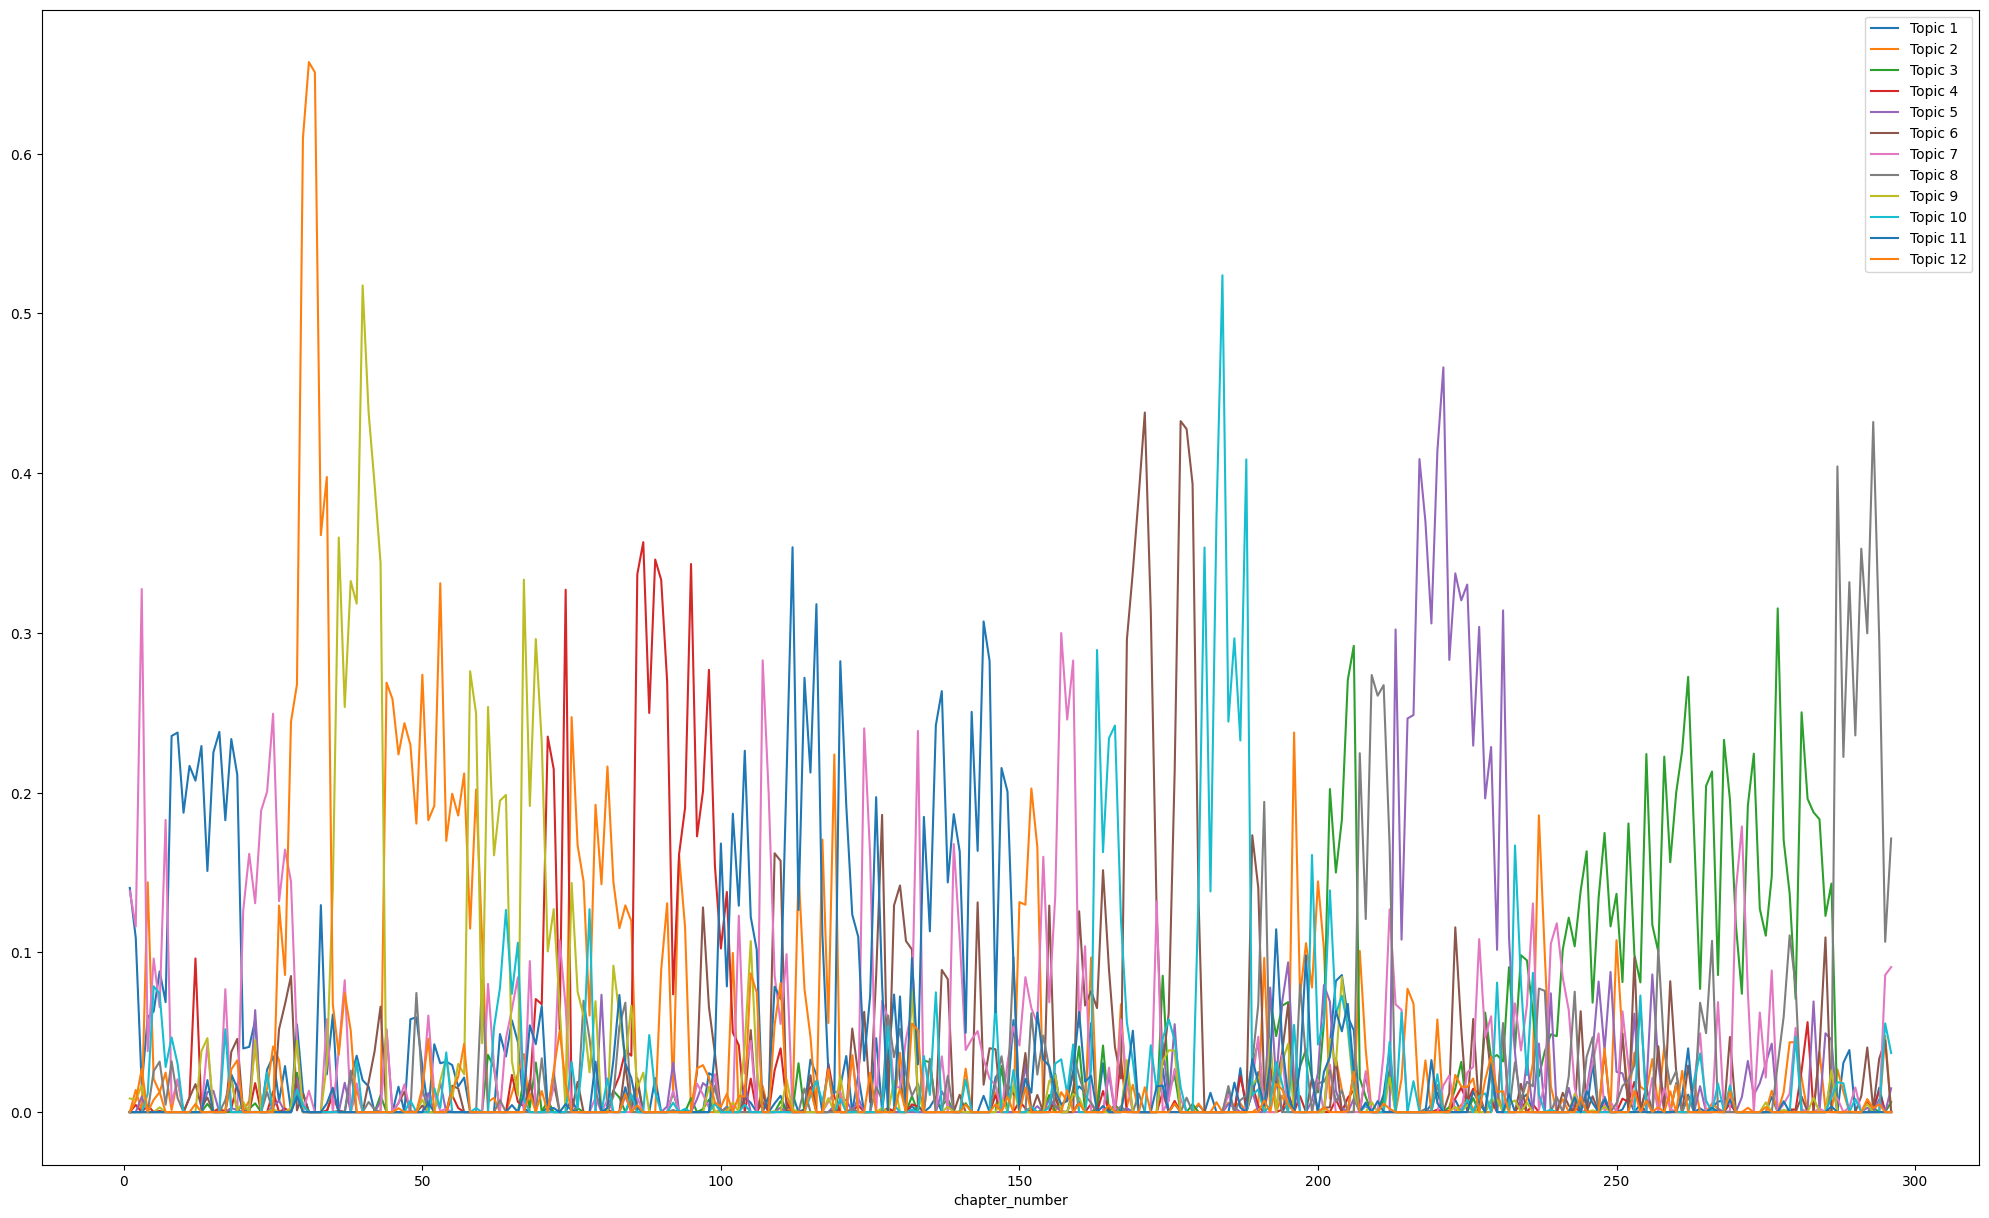

In [ ]:
# topic importance vs. chapter number
nmf_weights.plot("chapter_number", list(nmf_weights.columns[1:]), figsize=(25,15))

In [ ]:
# above is a buit hard to read so we can apply a gaussian filter
# this will show the trends a bit more clearly by removing error
from scipy.ndimage.filters import gaussian_filter1d

for i in range(n_components):
    nmf_weights[f'Topic {i+1} Normalized'] = gaussian_filter1d(nmf_model.transform(dtm)[:,i], sigma=1)
nmf_weights

<ipython-input-15-16d1672cc052>:3: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d
<ipython-input-15-16d1672cc052>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nmf_weights[f'Topic {i+1} Normalized'] = gaussian_filter1d(nmf_model.transform(dtm)[:,i], sigma=1)


,chapter_number,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,...,Topic 3 Normalized,Topic 4 Normalized,Topic 5 Normalized,Topic 6 Normalized,Topic 7 Normalized,Topic 8 Normalized,Topic 9 Normalized,Topic 10 Normalized,Topic 11 Normalized,Topic 12 Normalized
0,1,0.140357,0.000000,0.000000,0.000000,0.000000,0.000000,0.138453,0.000000,0.008540,...,0.000000,0.001344,0.000564,0.000000,0.142437,0.000003,8.718205e-03,0.000063,0.0,0.003643
1,2,0.109082,0.013866,0.000000,0.004476,0.000000,0.000000,0.116163,0.000000,0.007720,...,0.000000,0.002038,0.002339,0.000000,0.169615,0.000118,9.620701e-03,0.000977,0.0,0.009399
2,3,0.016352,0.000000,0.000000,0.000000,0.009661,0.000000,0.327493,0.000000,0.016435,...,0.000000,0.002129,0.003854,0.000000,0.181594,0.001526,8.937603e-03,0.007353,0.0,0.012958
3,4,0.059518,0.143894,0.000000,0.004308,0.000000,0.000000,0.038118,0.000000,0.000000,...,0.000000,0.001997,0.002338,0.000000,0.128979,0.007939,4.593752e-03,0.027757,0.0,0.009463
4,5,0.063011,0.020749,0.000000,0.000000,0.000000,0.000000,0.096147,0.025652,0.000000,...,0.000000,0.001226,0.000522,0.000000,0.091597,0.018277,1.645441e-03,0.053861,0.0,0.007585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,292,0.000000,0.000000,0.000000,0.005997,0.002712,0.040459,0.000000,0.299737,0.005080,...,0.000663,0.003762,0.001514,0.020996,0.001240,0.340196,2.026700e-03,0.000701,0.0,0.004099
292,293,0.000000,0.000000,0.002737,0.002752,0.000000,0.001784,0.000000,0.432059,0.000000,...,0.001120,0.005702,0.002651,0.021545,0.005116,0.343234,1.229256e-03,0.003204,0.0,0.004120
293,294,0.015235,0.000000,0.000000,0.013029,0.007963,0.033410,0.000000,0.296186,0.000000,...,0.001030,0.006188,0.004192,0.026838,0.026079,0.276297,2.742841e-04,0.015608,0.0,0.002978
294,295,0.000000,0.047675,0.000000,0.000000,0.000000,0.044810,0.085804,0.106584,0.000000,...,0.002009,0.003330,0.006341,0.026441,0.061476,0.190100,2.251461e-05,0.033348,0.0,0.001352


<Axes: xlabel='chapter_number'>

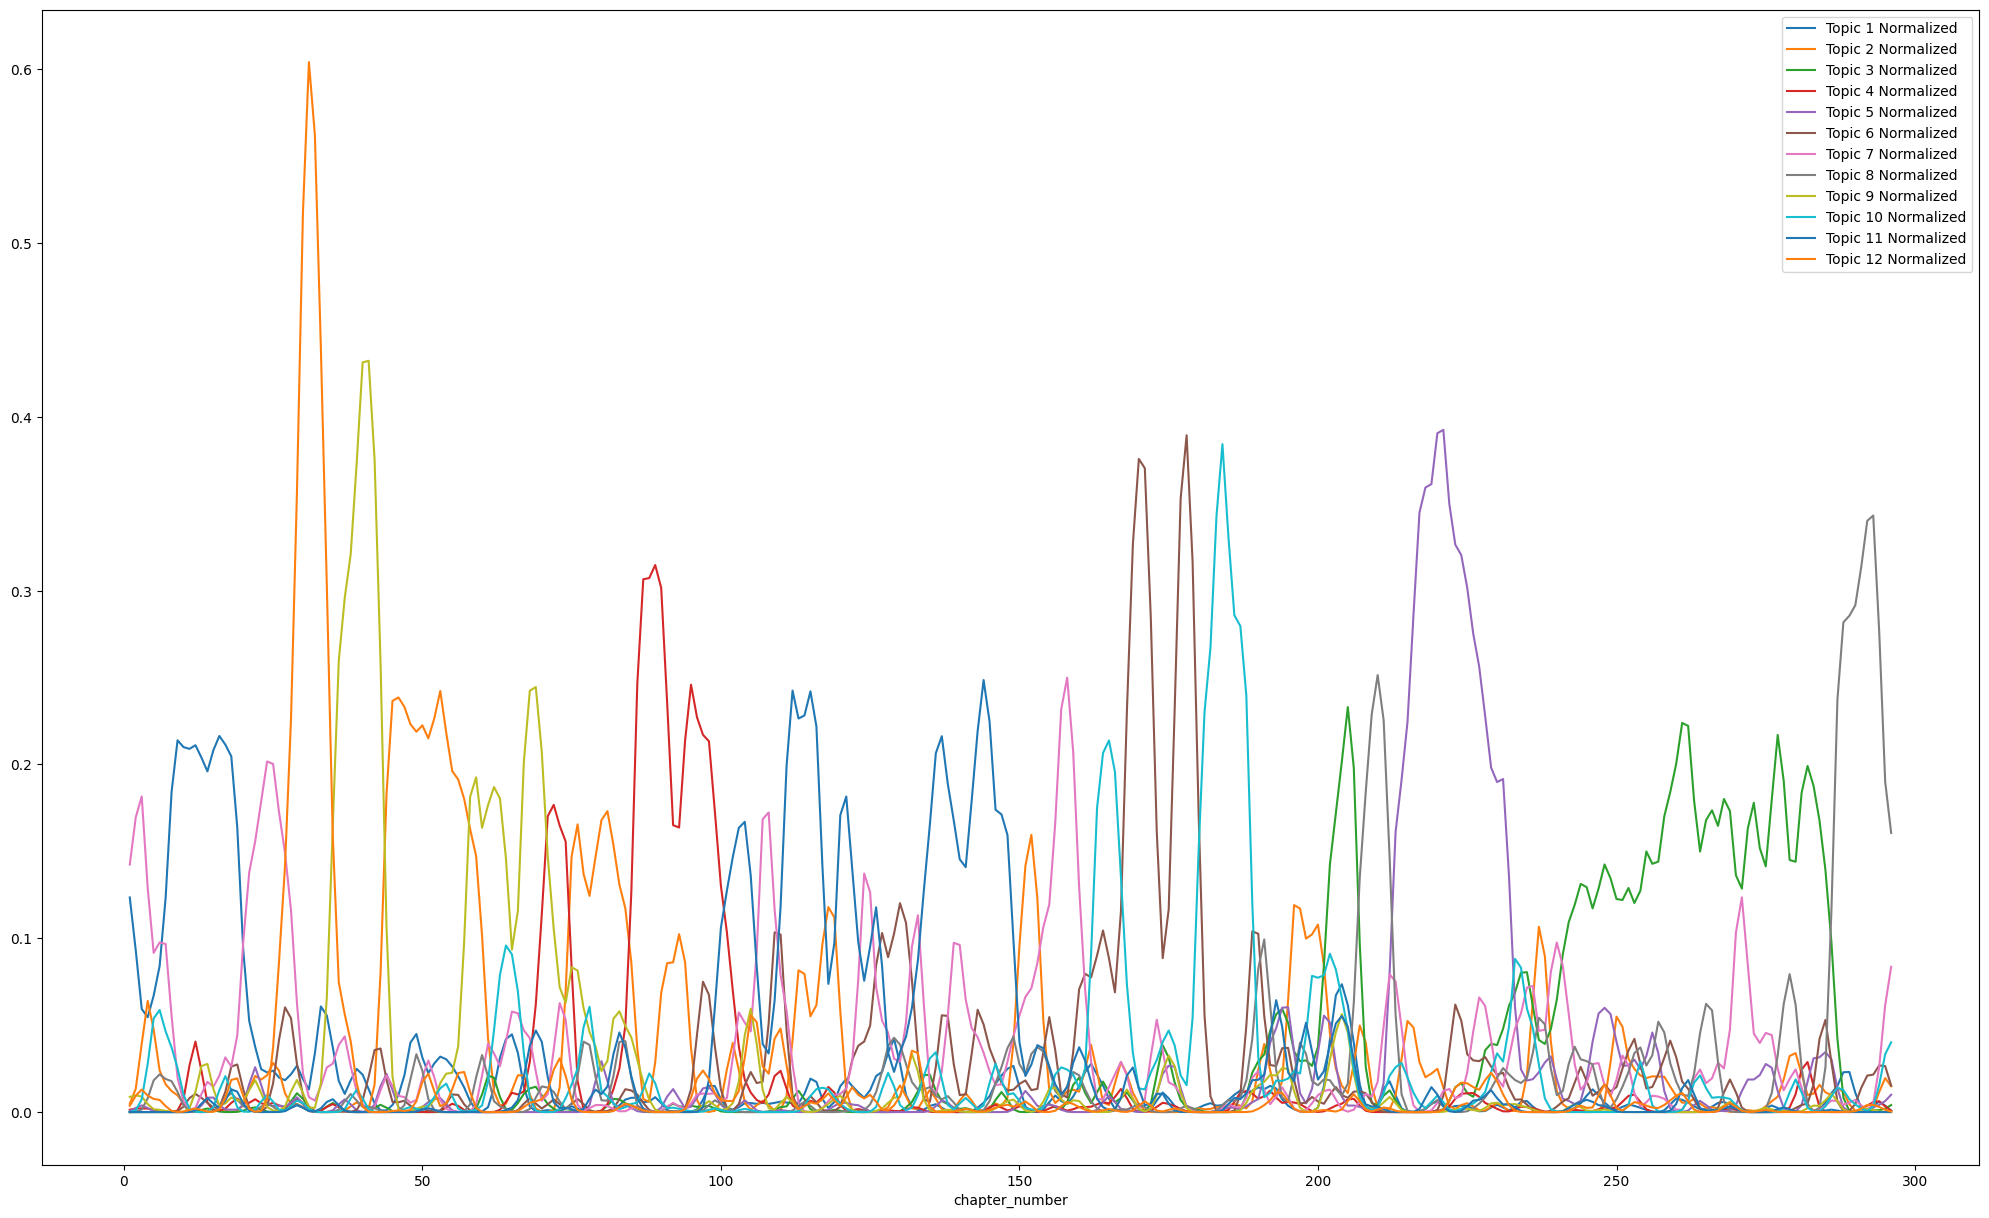

In [ ]:
# topic importance vs. chapter number
nmf_weights.plot("chapter_number", list(nmf_weights.columns[13:]), figsize=(25,15))

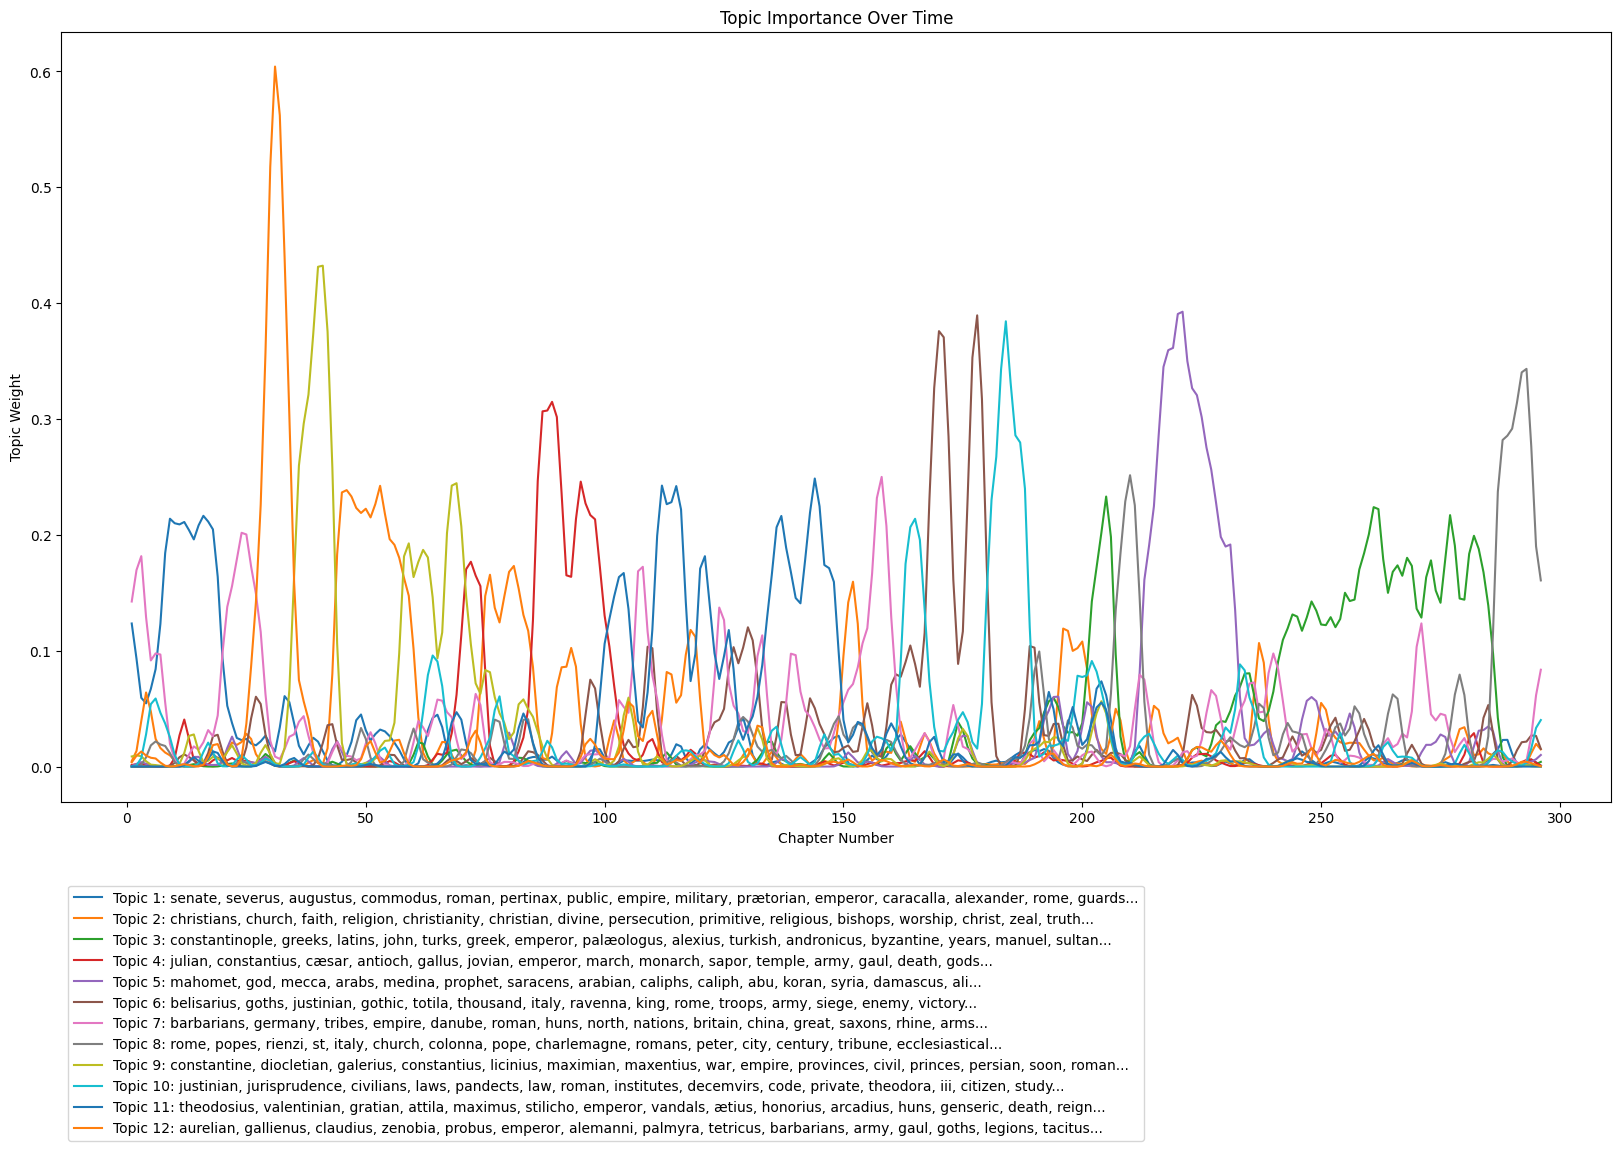

In [ ]:
# clean up the plot a bit
fig, ax = plt.subplots(figsize=(20, 10))
linewidth=3
alpha=0.8

for i in range(n_components):
    top_features_ind = nmf_model.components_[i].argsort()[:-top_words - 1:-1]
    top_features = [tfidf.get_feature_names_out()[i] for i in top_features_ind]
    label = f'Topic {i+1}: {", ".join(top_features).replace("¾","æ")}...'
    ax.plot(nmf_weights['chapter_number'], nmf_weights[f'Topic {i+1} Normalized'], label=label)

ax.title.set_text('Topic Importance Over Time')
ax.set_xlabel('Chapter Number')
ax.set_ylabel('Topic Weight')
ax.legend(bbox_to_anchor=(0,-.1), loc="upper left")

### Interpretation

Interpreting topic models can be difficult. They fall into *unsupervised* learning, which means we don't have a validation set with which to evaulate our results. Thus, the interpretation of a topic model often depends on why someone is modeling the topics in a text in the first place. For example, one might want to create a topic model for Gibbon's *Decline and Fall* because they are interested in the importance of certain ideas about history as they develop in the course of the book. In this case, they might look at the figure above and see that most topics occur as spikes, meaning that Gibbon will treat a subject closely and then move on to a different one.

I recommend that you try these visualization examples with the LDA model, as I only used the NMF model. You'll get much different results. Why do you think that is? What does it mean about the topics from the LDA model?